<h1 align="center">Data Bias Detection Music Data</h1>

Bias refers to a systematic error that leads to an inaccurate representation of reality in data or models. This file aims to discover and mitigate any kind of Bias in the Spotify Dataset that is going to be part of the Vibify pipeline. Addressing bias is crucial for ensuring fairness and it will provide more validity of analyses and predictions.

## Exploring Data

In [4]:
# Importing Libraries
import pandas as pd
import numpy as np
import gdown
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display
import os
import kagglehub
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

C:\Users\Surface\anaconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
# Download the dataset
path = kagglehub.dataset_download("mrmorj/dataset-of-songs-in-spotify")
df = pd.read_csv(f"{path}/genres_v2.csv")
df.head(1)

C:\Users\Surface\AppData\Local\Temp\ipykernel_21616\4084912865.py:3: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"{path}/genres_v2.csv")


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.42,0.0598,0.0134,0.0556,0.389,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN


In [6]:
#Check the size of the data
print(f'The dataset has {df.shape[0]} records and {df.shape[1]} columns')

The dataset has 42305 records and 22 columns


In [7]:
#Check general information of the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [8]:
#Check duplicate values in the data
print(f'The data set has {df.duplicated().sum()} duplicate values' )

The data set has 0 duplicate values


In [9]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Unnamed: 0
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,20780.000000
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056,250865.846685,3.972580,10483.970645
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623,102957.713571,0.268342,6052.359519
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000,1.000000,0.000000
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,179840.000000,4.000000,5255.750000
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000,224760.000000,4.000000,10479.500000
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000,301133.000000,4.000000,15709.250000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,913052.000000,5.000000,20999.000000


We will be focused just in songs that have a name, the rest will be eliminated from the data.

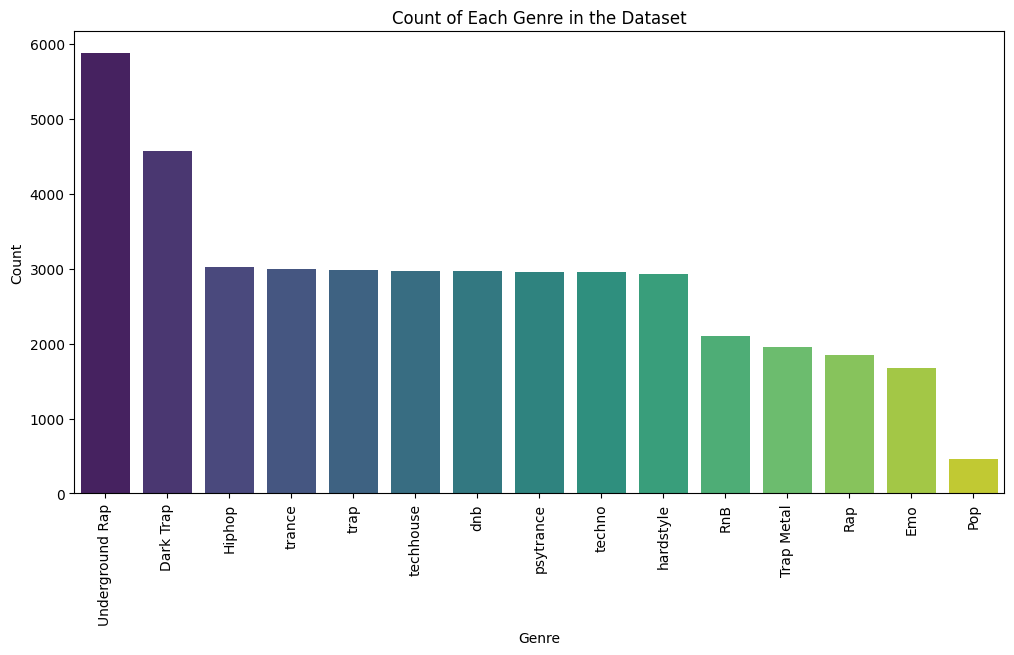

In [11]:
#Check of number of records per genre
plt.figure(figsize=(12, 6))
sns.countplot(x='genre', data=df, order=df['genre'].value_counts().index, palette='viridis')
plt.title('Count of Each Genre in the Dataset')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.show()

As we can see, our data contains more songs from certain genres than others. By cleaning the data, we aim to reduce this imbalance.

In [13]:
# Check for missing values in each column
print(df.isnull().sum())

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
Unnamed: 0          21525
title               21525
dtype: int64


In [14]:
#Data Cleaning
df[df['song_name'].isnull()]
df = df.dropna(subset=['song_name', 'uri'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21519 entries, 0 to 21524
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      21519 non-null  float64
 1   energy            21519 non-null  float64
 2   key               21519 non-null  int64  
 3   loudness          21519 non-null  float64
 4   mode              21519 non-null  int64  
 5   speechiness       21519 non-null  float64
 6   acousticness      21519 non-null  float64
 7   instrumentalness  21519 non-null  float64
 8   liveness          21519 non-null  float64
 9   valence           21519 non-null  float64
 10  tempo             21519 non-null  float64
 11  type              21519 non-null  object 
 12  id                21519 non-null  object 
 13  uri               21519 non-null  object 
 14  track_href        21519 non-null  object 
 15  analysis_url      21519 non-null  object 
 16  duration_ms       21519 non-null  int64  
 17

In [16]:
#Droping columns that do not contribute to the analysis
df = df.drop(['Unnamed: 0', 'title'], axis=1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21519 entries, 0 to 21524
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      21519 non-null  float64
 1   energy            21519 non-null  float64
 2   key               21519 non-null  int64  
 3   loudness          21519 non-null  float64
 4   mode              21519 non-null  int64  
 5   speechiness       21519 non-null  float64
 6   acousticness      21519 non-null  float64
 7   instrumentalness  21519 non-null  float64
 8   liveness          21519 non-null  float64
 9   valence           21519 non-null  float64
 10  tempo             21519 non-null  float64
 11  type              21519 non-null  object 
 12  id                21519 non-null  object 
 13  uri               21519 non-null  object 
 14  track_href        21519 non-null  object 
 15  analysis_url      21519 non-null  object 
 16  duration_ms       21519 non-null  int64  
 17

In [18]:
# Check for missing values in each column
print(df.isnull().sum())

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id                  0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
genre               0
song_name           0
dtype: int64


In [19]:
# Unique values in categorical column
genre_counts = df['genre'].value_counts()
genre_counts

genre
Underground Rap    5875
Dark Trap          4578
Hiphop             3022
RnB                2099
Trap Metal         1956
Rap                1848
Emo                1680
Pop                 461
Name: count, dtype: int64

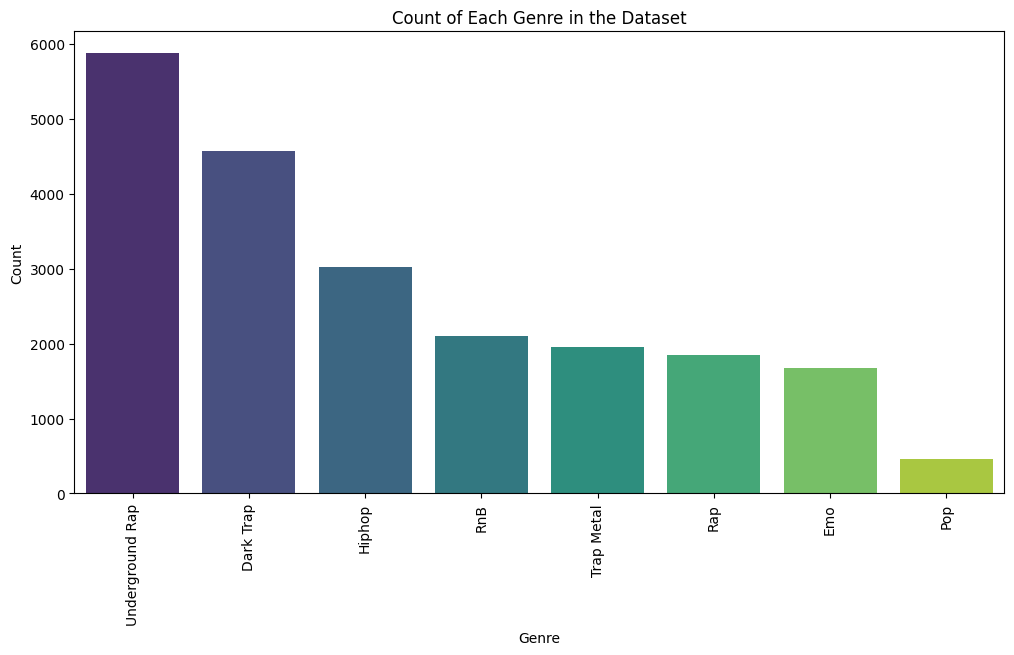

In [20]:
#Check of number of records per genre
plt.figure(figsize=(12, 6))
sns.countplot(x='genre', data=df, order=df['genre'].value_counts().index, palette='viridis')
plt.title('Count of Each Genre in the Dataset')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.show()

In [21]:
# Select the specific columns for correlation analysis
numerical_df = df.select_dtypes(exclude=['object'])
numerical_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,21519.000000,21519.000000,21519.000000,21519.000000,21519.000000,21519.000000,21519.000000,21519.000000,21519.000000,21519.000000,21519.000000,21519.000000,21519.000000
mean,0.674583,0.657252,5.144942,-7.039576,0.583020,0.178072,0.167282,0.075957,0.195378,0.417385,151.480713,194521.728844,3.968539
std,0.159427,0.175719,3.693472,2.906579,0.493071,0.140648,0.208450,0.220703,0.151472,0.233708,29.137425,60376.433104,0.325633
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.021000,0.020600,57.967000,38333.000000,1.000000
25%,0.566000,0.535000,1.000000,-8.645500,0.000000,0.056850,0.016800,0.000000,0.101000,0.223000,129.961000,150715.000000,4.000000
50%,0.697000,0.660000,5.000000,-6.687000,1.000000,0.133000,0.080000,0.000001,0.130000,0.401000,149.648000,191587.000000,4.000000
75%,0.796000,0.792000,8.000000,-5.049500,1.000000,0.277000,0.239000,0.000713,0.250000,0.593000,174.029000,230636.500000,4.000000
max,0.988000,0.999000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.973000,0.980000,220.290000,728413.000000,5.000000


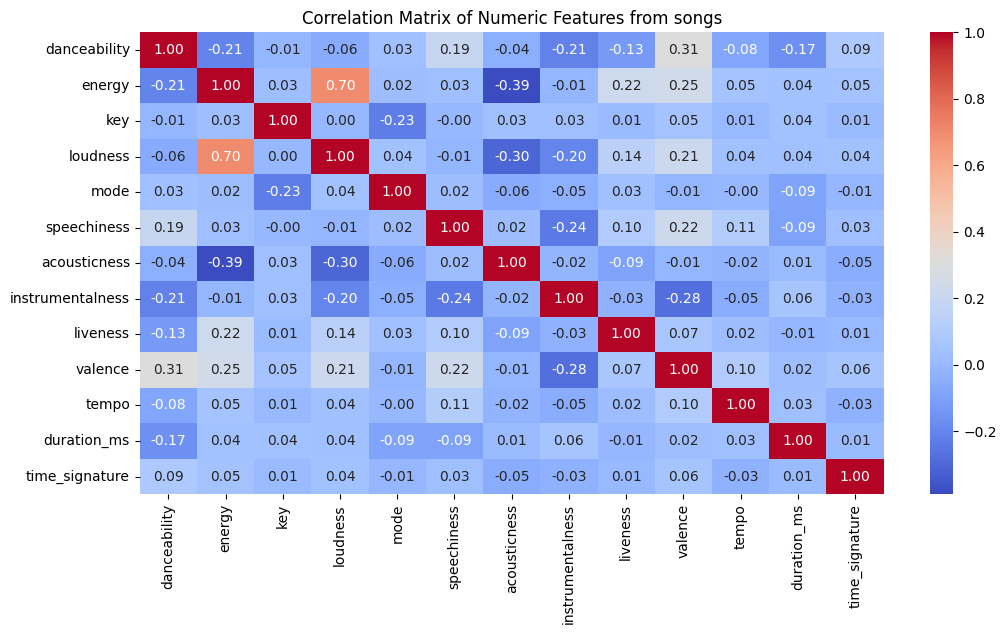

In [22]:
# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features from songs")
plt.show()

We can observe that features such as loudness and energy are strongly correlated. Meanwhile, some features like acousticness and energy are negatively correlated, meaning that as a song’s energy increases, its acousticness tends to decrease. 

In [24]:
#Mean numerical values per genre
numerical_df['genre'] = df['genre']
genre_demographics = numerical_df.groupby('genre').mean()
genre_demographics

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
genre,,,,,,,,,,,,,
Dark Trap,0.618834,0.646851,5.298384,-7.998401,0.536479,0.123434,0.159493,0.277276,0.185081,0.273663,149.791186,187707.330275,3.961337
Emo,0.493699,0.761175,5.052976,-5.433641,0.685714,0.080325,0.143094,0.011402,0.195243,0.444145,153.888640,218317.432143,3.938690
Hiphop,0.699008,0.654608,5.547981,-7.009065,0.527465,0.217144,0.195773,0.016923,0.210732,0.523805,163.003016,228053.009596,3.975844
Pop,0.676807,0.697638,5.399132,-5.632072,0.548807,0.088363,0.149251,0.013831,0.177949,0.550264,152.098937,211392.828633,3.984816
Rap,0.742877,0.620083,5.048701,-6.887086,0.522186,0.217862,0.170566,0.006939,0.181320,0.440921,126.006374,203007.674784,3.985931
RnB,0.674206,0.598884,5.021915,-6.899896,0.532158,0.143110,0.225276,0.007400,0.178984,0.493974,157.533793,226402.473559,3.960934
Trap Metal,0.647564,0.749157,4.663088,-5.879087,0.717791,0.209677,0.114926,0.057051,0.243655,0.348786,148.684947,147195.234151,3.953476
Underground Rap,0.744658,0.635776,5.059064,-7.362036,0.613617,0.224992,0.162708,0.025280,0.191116,0.444629,152.914521,176152.595234,3.979915


As observed above, tempo, loudness, duration-ms and key are not normalized

## Data Bias

To connect our dataset to our main project, we will label the songs based on their valence and energy. To do this, we will use Russell's Circumplex Model.

<div style="text-align: center;">
    <img src="https://www.researchgate.net/publication/362789625/figure/fig1/AS:11431281079813638@1660878772518/Russells-circumplex-model-of-emotions51.ppm" style="max-width: 100%;">
</div>
ResearchGate. (2023). Russell’s Circumplex Model of Emotions [Image]. Retrieved from https://www.researchgate.net/publication/362789625/figure/fig1/AS:11431281079813638@1660878772518/Russells-circumplex-model

The Russell’s Circumplex Model of Emotions places emotions on a two-dimensional circle. The model organizes emotions along two main axes: valence (pleasant to unpleasant) and arousal (low to high energy). Emotions are positioned around the circle to show how they relate in terms of intensity and positivity or negativity. This setup helps explain emotions as connected and 
variable rather than as separate experiences.

We will conduct a PCA and clustering analysis to label our songs with an emotion. We will present the results for different datasets to analyze which partition is the most accurate. However, it is important to state that since we are solely basing our results on the songs' metrics, our dataset does not contain any bias towards a specific demographic. While we recognize that using Russell's Circumplex Model for emotion labeling may introduce certain biases, we believe it is   the most effective method for our model deployment.

### Pipeline based on the orginal dataset

C:\Users\Surface\AppData\Local\Temp\ipykernel_21616\573623085.py:95: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"{path}/genres_v2.csv")


PCA applied successfully.


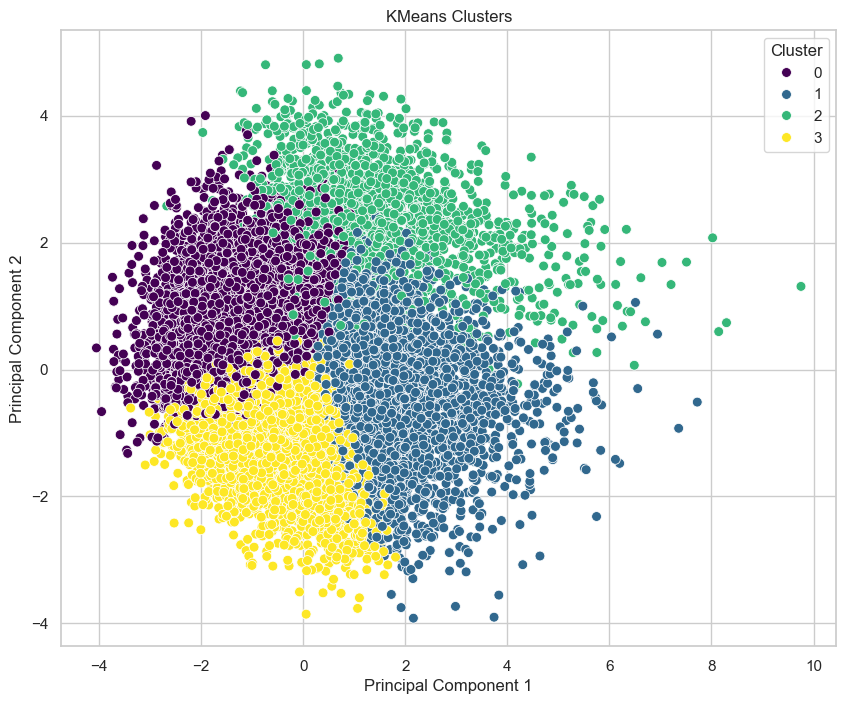

KMeans clustering applied with 4 clusters.
cluster
3    6986
0    5341
1    4379
2    1646
Name: count, dtype: int64


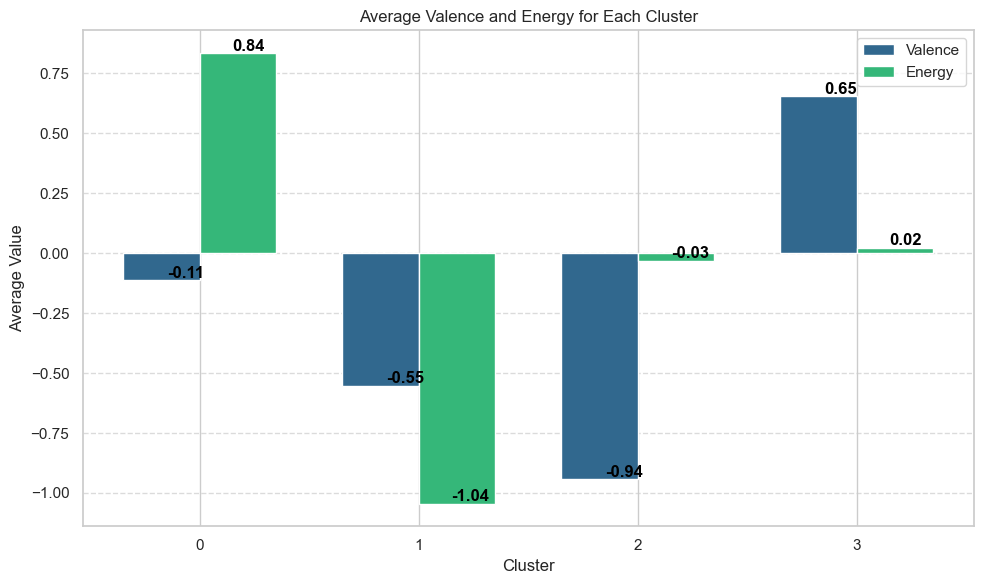

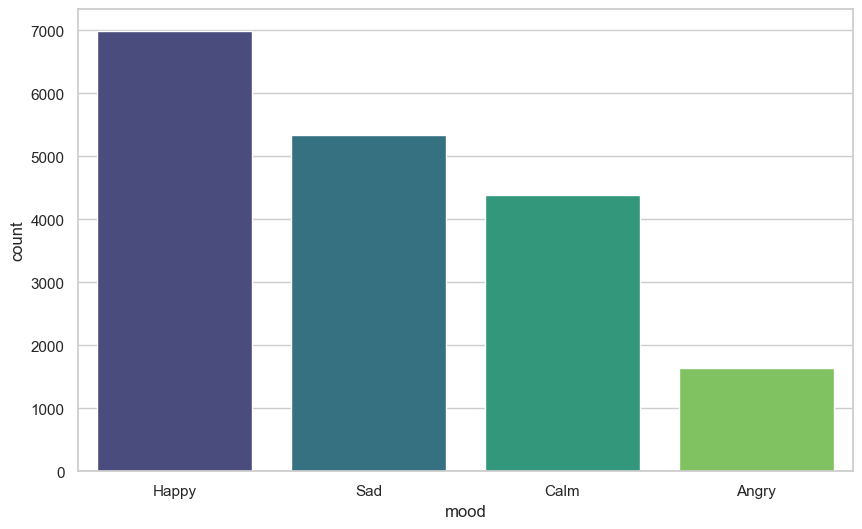

In [36]:
def data_overview(df: pd.DataFrame) -> None:
    """Displays basic info and statistics about the dataset."""
    if df is not None:
      print(f'Shape: {df.shape}')
      print(f'Length: {len(df)}')
      print(f'Info: {df.info()}')
      print(f'Describe: {df.describe()}')
      print(f'Columns: {df.columns}')
    else:
      print("Dataframe is empty or not loaded.")

def data_cleaning(df: pd.DataFrame) -> pd.DataFrame:
  df[df['song_name'].isnull()]
  df = df.dropna(subset=['song_name', 'uri'])
  df = df.drop_duplicates(subset=['song_name', 'uri'])
  cols = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','uri','genre','song_name']
  filtered_df = df[cols]
  return filtered_df

def scale_features(df: pd.DataFrame) -> pd.DataFrame:
    """Scales specified features in the dataframe."""
    features = [i for i in df.columns if df[i].dtype != 'object']
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df[features])
    return pd.DataFrame(scaled_data, columns=features)

def apply_pca(data: pd.DataFrame, n_components: int = 10) -> pd.DataFrame:
    """Applies PCA to reduce data dimensions."""

    features = [i for i in data.columns if data[i].dtype != 'object']
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(data[features])
    print("PCA applied successfully.")
    return principal_components

def visualize_clusters(pca_df: pd.DataFrame, df: pd.DataFrame) -> None:
    """Visualizes clusters in a 2D PCA plot."""
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=pca_df[:,0], y=pca_df[:,1], hue=df['cluster'], palette='viridis', s=50)
    plt.title("KMeans Clusters")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend(title="Cluster")
    plt.show()

def apply_kmeans(df: pd.DataFrame, n_clusters: int = 4) -> pd.DataFrame:
    """Applies KMeans clustering to the data."""
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    data = apply_pca(df)
    df['cluster'] = kmeans.fit_predict(data)
    visualize_clusters(data, df)
    print(f"KMeans clustering applied with {n_clusters} clusters.")
    print(df['cluster'].value_counts())
    return df

def getCluster_Mood(df: pd.DataFrame) -> pd.DataFrame:
  sns.set(style="whitegrid")
  cluster_means = df.groupby('cluster')[['valence', 'energy']].mean().reset_index()
  colors = sns.color_palette('viridis', 2)
  bar_width = 0.35
  index = cluster_means['cluster']

  plt.figure(figsize=(10, 6))

  plt.bar(index - bar_width/2, cluster_means['valence'], bar_width, color=colors[0], label='Valence')
  plt.bar(index + bar_width/2, cluster_means['energy'], bar_width, color=colors[1], label='Energy')

  for i, valence, energy in zip(index, cluster_means['valence'], cluster_means['energy']):
    plt.text(i - 0.15, valence + 0.01, f'{valence:.2f}', color='black', fontweight='bold')
    plt.text(i + 0.15, energy + 0.01, f'{energy:.2f}', color='black', fontweight='bold')

  plt.xlabel('Cluster')
  plt.ylabel('Average Value')
  plt.title('Average Valence and Energy for Each Cluster')
  plt.xticks(index, cluster_means['cluster'])
  plt.legend()

  plt.grid(axis='y', linestyle='--', alpha=0.7)

  plt.tight_layout()
  plt.show()
  df['mood'] = np.where(df['cluster'] == 0, 'Sad', np.nan)
  df['mood'] = np.where(df['cluster'] == 1, 'Calm', df['mood'])
  df['mood'] = np.where(df['cluster'] == 2, 'Angry', df['mood'])
  df['mood'] = np.where(df['cluster'] == 3, 'Happy', df['mood'])
  mood_counts = df['mood'].value_counts().reset_index()
  mood_counts.columns = ['mood', 'count']
  plt.figure(figsize=(10, 6))
  bar_plot = sns.barplot(x='mood', y='count', data=mood_counts, palette='viridis')
  return df

def runWhole(file_id: str) -> pd.DataFrame:
  df = path = kagglehub.dataset_download(file_id)
  df = pd.read_csv(f"{path}/genres_v2.csv")
  filtered_df = data_cleaning(df)
  scaled_df = scale_features(filtered_df)
  clustered_data = apply_kmeans(scaled_df)
  final_df = getCluster_Mood(clustered_data)
  return final_df

file_id = "mrmorj/dataset-of-songs-in-spotify"
final_df = runWhole(file_id)

## Pipeline Based on undersamppling

Now, if we can try to analyze the results of the pipeline if we introduce an undersample dataset based on the Pop genre, we will find the following results.

genre
Underground Rap    5044
Dark Trap          4578
Hiphop             2323
RnB                1875
Emo                1667
Rap                1274
Trap Metal         1187
Pop                 404
Name: count, dtype: int64
Undersampled 'pop' genre to 404 entries.
PCA applied successfully.


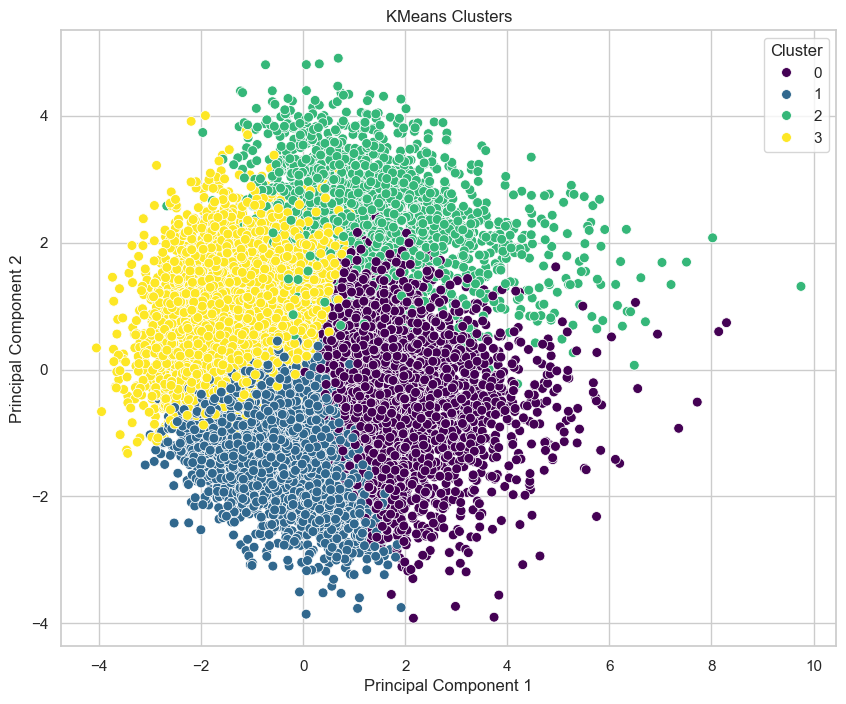

KMeans clustering applied with 4 clusters.
cluster
1    7151
3    5386
0    4170
2    1645
Name: count, dtype: int64


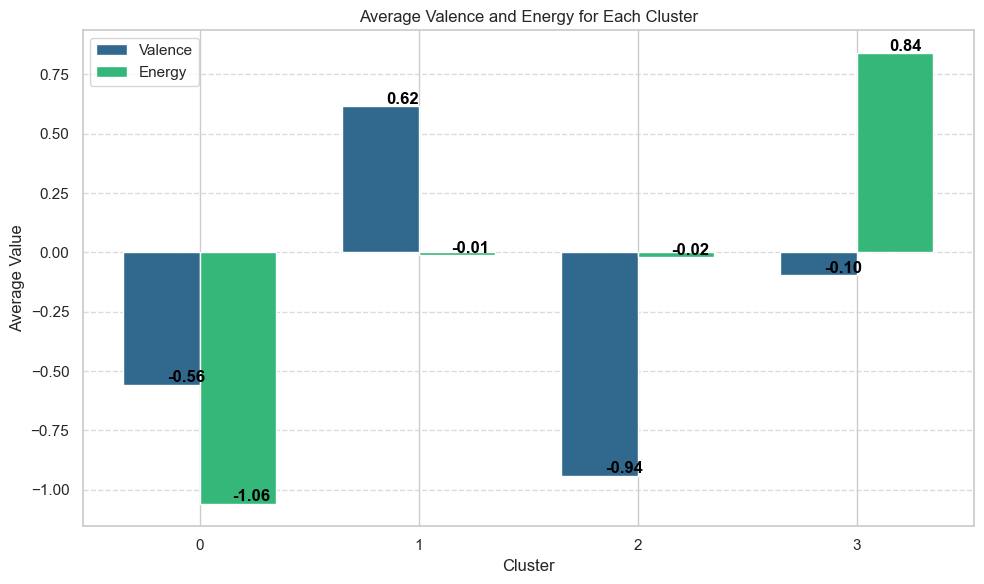

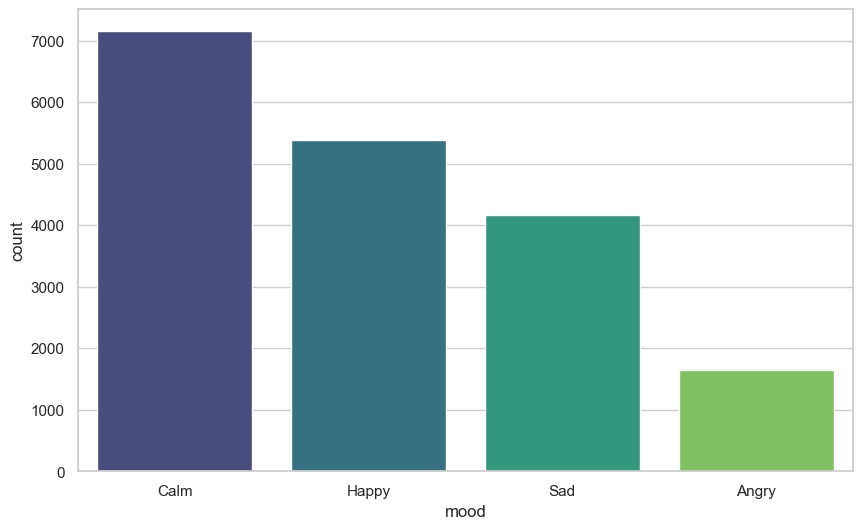

In [40]:
def undersample_genre(df: pd.DataFrame, genre: str) -> pd.DataFrame:
    if genre not in df['genre'].values:
        print(f"Genre '{genre}' not found in the dataset.")
        return pd.DataFrame()
    genre_count = df[df['genre'] == genre].shape[0]
    if genre_count == 0:
        print("No 'pop' songs found in the dataset.")
        return pd.DataFrame() 
        
    genre_df = df[df['genre'] == genre]
    non_genre_df = df[df['genre'] != genre]
    undersampled_genre_df = genre_df.sample(n=genre_count, random_state=42)
    undersampled_df = pd.concat([undersampled_genre_df, non_genre_df])
    print(f"Undersampled 'pop' genre to {genre_count} entries.")
    return undersampled_df
def runWhole(file_id: str) -> pd.DataFrame:
    df = path = kagglehub.dataset_download(file_id)
    df = pd.read_csv(f"{path}/genres_v2.csv", low_memory=False)
    filtered_df = data_cleaning(df)
    print(filtered_df['genre'].value_counts())
    undersampled_df = undersample_genre(filtered_df, genre='Pop')
    if undersampled_df.empty:
        print("Error: The undersampled DataFrame is empty. Please check the genre filtering.")
        return pd.DataFrame()
    scaled_df = scale_features(undersampled_df)
    clustered_data = apply_kmeans(scaled_df)
    final_df = getCluster_Mood(clustered_data)
    return final_df
file_id = "mrmorj/dataset-of-songs-in-spotify"
final_df = runWhole(file_id)

Based on the latest results, we can observe two important aspects:

1- Undersampling based on genre does not yield accurate results, as seen with the original dataset where there is a tendency to have more happy songs. This is due to the low number of records, which limits the model's ability to learn effectively from a broader range of songs.

2- Each time new songs are added, we need to verify the average valence and energy plot to ensure that emotions are correctly assigned. This step is crucial, as inaccuracies can introduce anomalies in our analysis.

## Conclusions

So far, we have cleaned the data to minimize the presence of outliers and removed any songs that lack names. Additionally, we  eliminated the genre information for each song to ensure that the clustering is based solely on the various characteristics of the songs themselves rather than on any external labels. By doing this, we decrease the risk of bias related to preconceived genre associations, leading to a more objective analysis. Undersampling based on genre won't provide the best result for our dataset since the results are not aligned with the emotion 